<H1>ALERT CLASSIFICATION (FAKE OR REAL)</H1>

In [81]:
import pandas as pd
import numpy as np




<H3>LOADING DATA </H3>

In [83]:
text=pd.read_csv("data.csv")
text.head()

,id,text,label,lat,lon,source
0,1,Huge waves hitting the shore,relevant,13.08,80.27,twitter
1,2,Beautiful sunny beach today,irrelevant,13.08,80.27,twitter
2,3,Tsunami alert!! run!!,panic,16.49,81.63,whatsapp
3,4,Cyclone warning in Odisha coast,relevant,19.31,84.79,facebook
4,5,"Going fishing, weather looks calm",irrelevant,15.50,73.82,citizen


In [5]:
text.dtypes

id          int64
text       object
label      object
lat       float64
lon       float64
source     object
dtype: object

In [6]:
text.size

360

In [7]:
text.shape

(60, 6)

In [9]:
text.isnull().sum()

id        0
text      0
label     0
lat       0
lon       0
source    0
dtype: int64

In [8]:
text.describe()

,id,lat,lon
count,60.000000,60.000000,60.000000
mean,30.500000,16.185833,81.044500
std,17.464249,4.587613,5.318302
min,1.000000,8.480000,70.370000
25%,15.750000,12.730000,76.265000
50%,30.500000,17.090000,80.270000
75%,45.250000,20.050000,85.840000
max,60.000000,22.570000,88.370000


<H2>TEXT PREPROCESSING</H2>

In [10]:
text["text"]=text["text"].str.lower()
text.head()


,id,text,label,lat,lon,source
0,1,huge waves hitting the shore,relevant,13.08,80.27,twitter
1,2,beautiful sunny beach today,irrelevant,13.08,80.27,twitter
2,3,tsunami alert!! run!!,panic,16.49,81.63,whatsapp
3,4,cyclone warning in odisha coast,relevant,19.31,84.79,facebook
4,5,"going fishing, weather looks calm",irrelevant,15.50,73.82,citizen


In [84]:
import re
import string
punct=string.punctuation
text["text"]=text["text"].str.replace(punct,"")
text.head()

,id,text,label,lat,lon,source
0,1,Huge waves hitting the shore,relevant,13.08,80.27,twitter
1,2,Beautiful sunny beach today,irrelevant,13.08,80.27,twitter
2,3,Tsunami alert!! run!!,panic,16.49,81.63,whatsapp
3,4,Cyclone warning in Odisha coast,relevant,19.31,84.79,facebook
4,5,"Going fishing, weather looks calm",irrelevant,15.50,73.82,citizen


In [13]:
text["target"] = text["label"].apply(lambda x: 1 if x in ["relevant", "panic"] else 0)
print(text[["label", "target"]].head())


        label  target
0    relevant       1
1  irrelevant       0
2       panic       1
3    relevant       1
4  irrelevant       0


In [85]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
text["no_stopwords"] = text["text"].astype(str).apply(
    lambda x: " ".join([word for word in x.split() if word.lower() not in stop_words])
)

text[["text", "no_stopwords"]].head
text.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,text,label,lat,lon,source,no_stopwords
0,1,Huge waves hitting the shore,relevant,13.08,80.27,twitter,Huge waves hitting shore
1,2,Beautiful sunny beach today,irrelevant,13.08,80.27,twitter,Beautiful sunny beach today
2,3,Tsunami alert!! run!!,panic,16.49,81.63,whatsapp,Tsunami alert!! run!!
3,4,Cyclone warning in Odisha coast,relevant,19.31,84.79,facebook,Cyclone warning Odisha coast
4,5,"Going fishing, weather looks calm",irrelevant,15.50,73.82,citizen,"Going fishing, weather looks calm"


In [24]:
import re
text["text"] = text["text"].str.replace(r"[!?:,]", "", regex=True)
text


,id,text,label,lat,lon,source,target,no_stopwords
0,1,huge waves hitting the shore,relevant,13.08,80.27,twitter,1,huge waves hitting shore
1,2,beautiful sunny beach today,irrelevant,13.08,80.27,twitter,0,beautiful sunny beach today
2,3,tsunami alert run,panic,16.49,81.63,whatsapp,1,tsunami alert!! run!!
3,4,cyclone warning in odisha coast,relevant,19.31,84.79,facebook,1,cyclone warning odisha coast
4,5,going fishing weather looks calm,irrelevant,15.50,73.82,citizen,0,"going fishing, weather looks calm"
5,6,flooded streets after high tide,relevant,22.57,88.36,twitter,1,flooded streets high tide
6,7,enjoying my holiday in goa,irrelevant,15.49,73.83,facebook,0,enjoying holiday goa
7,8,water entering houses after waves,relevant,17.69,83.29,whatsapp,1,water entering houses waves
8,9,omg water rising so fast,panic,17.69,83.29,twitter,1,omg water rising fast!
9,10,coast guard warning issued,relevant,19.97,85.82,citizen,1,coast guard warning issued


In [25]:
print(text['label'].value_counts())

label
relevant      27
irrelevant    19
panic         14
Name: count, dtype: int64


In [29]:
print(text[['text','label']].to_string(index=False))

                              text      label
      huge waves hitting the shore   relevant
       beautiful sunny beach today irrelevant
                 tsunami alert run      panic
   cyclone warning in odisha coast   relevant
  going fishing weather looks calm irrelevant
   flooded streets after high tide   relevant
        enjoying my holiday in goa irrelevant
 water entering houses after waves   relevant
          omg water rising so fast      panic
        coast guard warning issued   relevant
   the sea looks so peaceful today irrelevant
why is the tide so strong suddenly   relevant
         storm surge damaged boats   relevant
        just chilling at the beach irrelevant
      high waves crossing the road   relevant
  i see people running after alert      panic
                 beach party vibes irrelevant
    unusual sea level rise noticed   relevant
  breaking tsunami alert by incois   relevant
  scared everyone is leaving beach      panic
     perfect sunset at vizag beach

In [48]:
label_map = {
'relevant': 'real',
'irrelevant': 'fake',
'panic': 'real'
}
if text['label'].isnull().any():
   print('\nWarning: some labels were not in label_map. Unique labels found: ', text['label'].unique())
   text['label'] = text['label'].fillna('fake')


print("classification:")
print(text['label'].value_counts())

classification:
label
relevant      27
irrelevant    19
panic         14
Name: count, dtype: int64


<h2> DATA VISUALIZATION</h2>

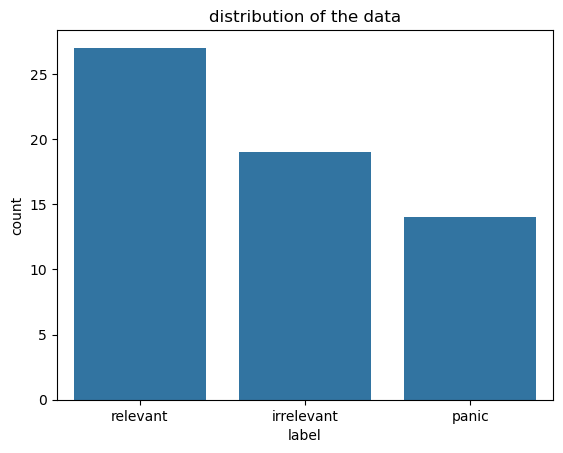

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="label", data=text)
plt.title("distribution of the data")
plt.show()


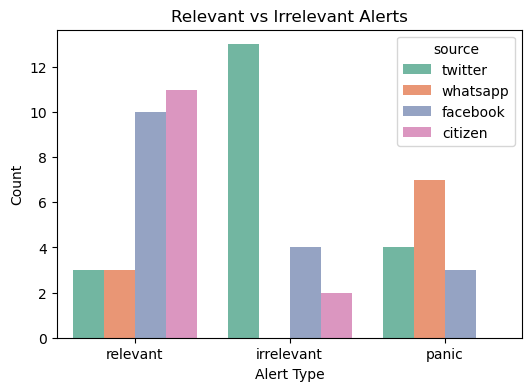

In [60]:

plt.figure(figsize=(6,4))
sns.countplot(x="label",hue="source" ,data=text, palette="Set2")
plt.title("Relevant vs Irrelevant Alerts")
plt.xlabel("Alert Type")
plt.ylabel("Count")
plt.show()


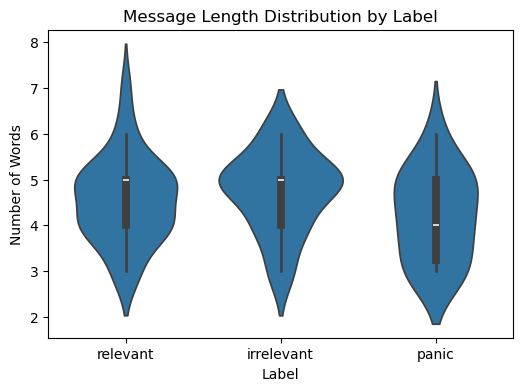

In [43]:

text["text_len"] = text["text"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(6,4))
sns.violinplot(x="label", y="text_len", data=text)
plt.title("Message Length Distribution by Label")
plt.xlabel("Label")
plt.ylabel("Number of Words")
plt.show()


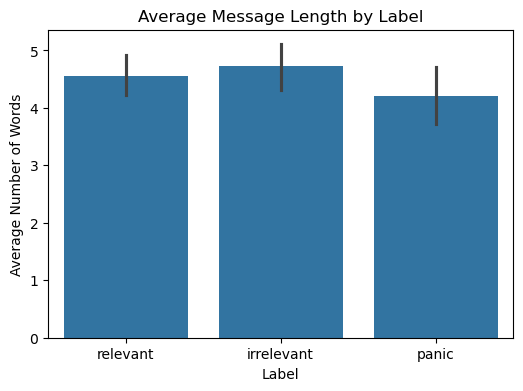

In [42]:
text["text_len"] = text["text"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(6,4))
sns.barplot(x="label", y="text_len", data=text)
plt.title("Average Message Length by Label")
plt.xlabel("Label")
plt.ylabel("Average Number of Words")
plt.show()


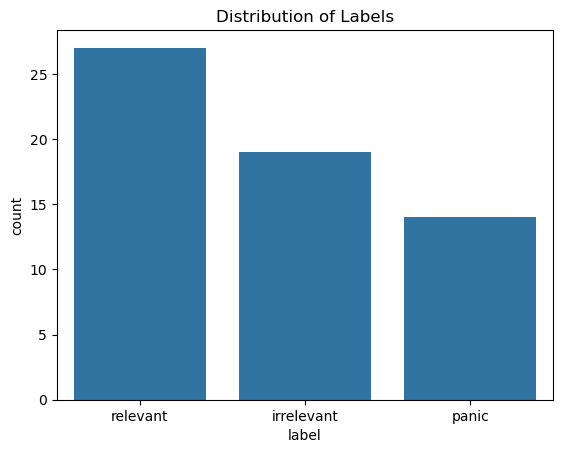

In [61]:
sns.countplot(x="label", data=text)
plt.title("Distribution of Labels")
plt.show()


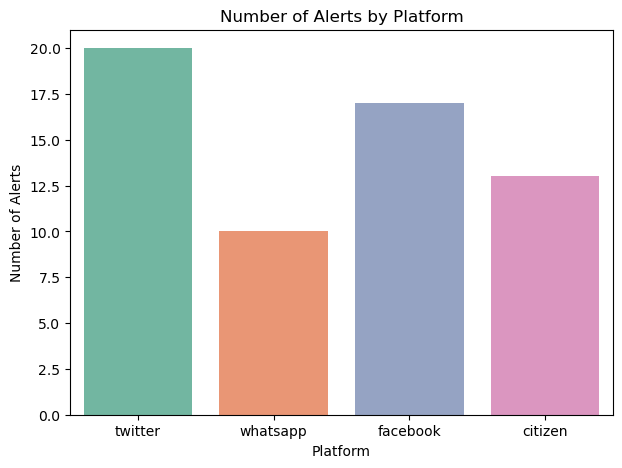

In [56]:

plt.figure(figsize=(7,5))
sns.countplot(x="source", hue="source",data=text, palette="Set2")
plt.title("Number of Alerts by Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Alerts")
plt.show()


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

<H2>TRAINING TESTING AND SPLITING DATA</H2>

In [86]:
X = text["text"]
y = text["label"]  
print(X.head())
print(y.head())


0         Huge waves hitting the shore
1          Beautiful sunny beach today
2                Tsunami alert!! run!!
3      Cyclone warning in Odisha coast
4    Going fishing, weather looks calm
Name: text, dtype: object
0      relevant
1    irrelevant
2         panic
3      relevant
4    irrelevant
Name: label, dtype: object


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<H1>TERM FREQUENCY(FEATURE EXTRACTION)</H1>